In [220]:
# opencv 3.4.2
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import math
cwd = os.getcwd()

def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

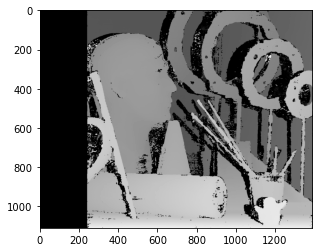

psnr:10.68939698267841


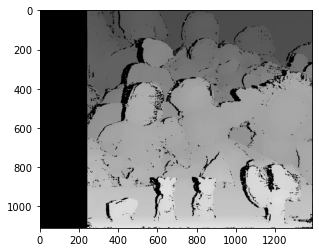

psnr:11.635890706460671


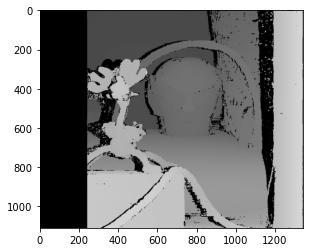

psnr:12.136635009856958


In [221]:
def sgbmOriginal(imgL,imgR):
    window_size = 3
    stereo = cv2.StereoSGBM_create(
        minDisparity=0,
        numDisparities=240,
        blockSize=3,
        P1=8 * 3 * window_size ** 2,
        P2=32 * 3 * window_size ** 2,
        disp12MaxDiff=1,
        uniquenessRatio=15,
        speckleWindowSize=0,
        speckleRange=2,
        preFilterCap=63,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )
    disparity = stereo.compute(imgL, imgR).astype(np.float32) / 16.0
    plt.imshow(disparity, 'gray')
    plt.show()
    return disparity

imgL = cv2.imread(cwd+'/Art/view1.png')
imgR = cv2.imread(cwd+'/Art/view5.png')

imgG = cv2.imread(cwd+'/Art/disp1.png',0)
disparity = sgbmOriginal(imgL,imgR)
print('psnr:'+str(calculate_psnr(imgG,disparity)))

imgL = cv2.imread(cwd+'/Dolls/view1.png')
imgR = cv2.imread(cwd+'/Dolls/view5.png')
imgG = cv2.imread(cwd+'/Dolls/disp1.png',0)
disparity = sgbmOriginal(imgL,imgR)
print('psnr:'+str(calculate_psnr(imgG,disparity)))

imgL = cv2.imread(cwd+'/Reindeer/view1.png')
imgR = cv2.imread(cwd+'/Reindeer/view5.png')
imgG = cv2.imread(cwd+'/Reindeer/disp1.png',0)
disparity = sgbmOriginal(imgL,imgR)
print('psnr:'+str(calculate_psnr(imgG,disparity)))

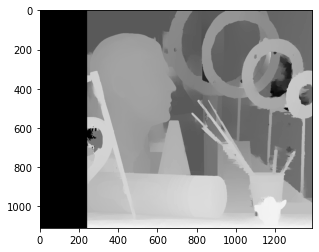

psnr:12.032871802053684


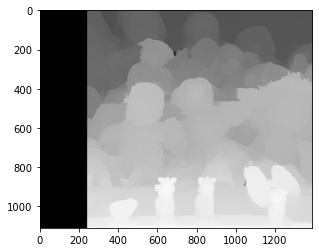

psnr:12.803732736325127


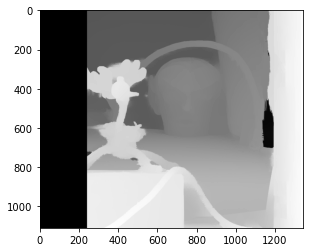

psnr:13.29344696231433


In [222]:
def sgbmOriginalWLS(imgL,imgR):
    window_size = 3
    left_matcher = cv2.StereoSGBM_create(
        minDisparity=0,
        numDisparities=240,
        blockSize=3,
        P1=8 * 3 * window_size ** 2,
        P2=32 * 3 * window_size ** 2,
        disp12MaxDiff=1,
        uniquenessRatio=15,
        speckleWindowSize=0,
        speckleRange=2,
        preFilterCap=63,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )
    
    right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)
    wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
    wls_filter.setLambda(8000)
    wls_filter.setSigmaColor(1.5)
    dispL = left_matcher.compute(imgL, imgR)
    dispR = right_matcher.compute(imgR, imgL)
    dispL = np.int16(dispL)
    dispR = np.int16(dispR)
    disparity = wls_filter.filter(dispL, imgL, None, dispR) / 16.0
    plt.imshow(disparity, 'gray')
    plt.show()
    return disparity

imgL = cv2.imread(cwd+'/Art/view1.png')
imgR = cv2.imread(cwd+'/Art/view5.png')

imgG = cv2.imread(cwd+'/Art/disp1.png',0)
disparity = sgbmOriginalWLS(imgL,imgR)
print('psnr:'+str(calculate_psnr(imgG,disparity)))

imgL = cv2.imread(cwd+'/Dolls/view1.png')
imgR = cv2.imread(cwd+'/Dolls/view5.png')
imgG = cv2.imread(cwd+'/Dolls/disp1.png',0)
disparity = sgbmOriginalWLS(imgL,imgR)
print('psnr:'+str(calculate_psnr(imgG,disparity)))

imgL = cv2.imread(cwd+'/Reindeer/view1.png')
imgR = cv2.imread(cwd+'/Reindeer/view5.png')
imgG = cv2.imread(cwd+'/Reindeer/disp1.png',0)
disparity = sgbmOriginalWLS(imgL,imgR)
print('psnr:'+str(calculate_psnr(imgG,disparity)))

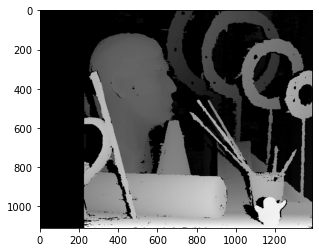

psnr:17.779064091657954


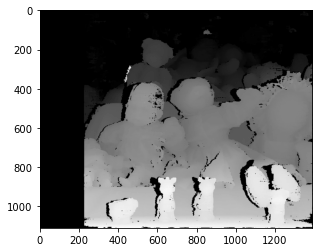

psnr:18.50806976751943


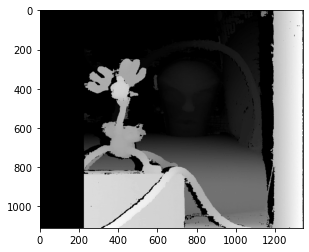

psnr:19.02728472780691


In [227]:
def sgbmOptimized(imgL,imgR):
    window_size = 3
    stereo = cv2.StereoSGBM_create(
        minDisparity=96,
        numDisparities=128,
        blockSize=3,
        P1=4 * 3 * window_size ** 2,
        P2=16 * 3 * window_size ** 2,
        disp12MaxDiff=1,
        uniquenessRatio=5,
        speckleWindowSize=600,
        speckleRange=1,
        preFilterCap=0,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )
    disparity = stereo.compute(imgL, imgR).astype(np.float32) / 16.0
    plt.imshow(disparity, 'gray')
    plt.show()
    return disparity

imgL = cv2.imread(cwd+'/Art/view1.png')
imgR = cv2.imread(cwd+'/Art/view5.png')
imgG = cv2.imread(cwd+'/Art/disp1.png',0)
disparity = sgbmOptimized(imgL,imgR)
print('psnr:'+str(calculate_psnr(imgG,disparity)))

imgL = cv2.imread(cwd+'/Dolls/view1.png')
imgR = cv2.imread(cwd+'/Dolls/view5.png')
imgG = cv2.imread(cwd+'/Dolls/disp1.png',0)
disparity = sgbmOptimized(imgL,imgR)
print('psnr:'+str(calculate_psnr(imgG,disparity)))

imgL = cv2.imread(cwd+'/Reindeer/view1.png')
imgR = cv2.imread(cwd+'/Reindeer/view5.png')
imgG = cv2.imread(cwd+'/Reindeer/disp1.png',0)
disparity = sgbmOptimized(imgL,imgR)
print('psnr:'+str(calculate_psnr(imgG,disparity)))

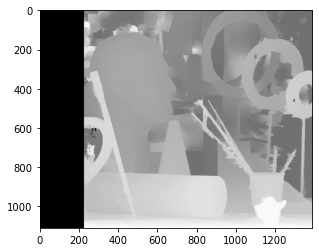

psnr:11.891751548078862


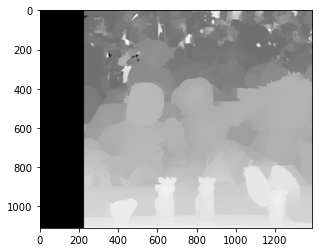

psnr:12.698359569940402


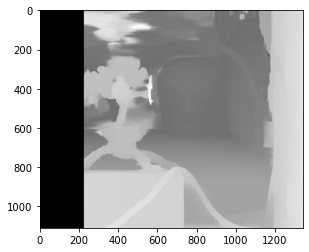

psnr:12.666364132870767


In [226]:
def sgbmOptimizedWLS(imgL,imgR):
    window_size = 3
    left_matcher = cv2.StereoSGBM_create(
        minDisparity=96,
        numDisparities=128,
        blockSize=3,
        P1=4 * 3 * window_size ** 2,
        P2=16 * 3 * window_size ** 2,
        disp12MaxDiff=1,
        uniquenessRatio=5,
        speckleWindowSize=600,
        speckleRange=1,
        preFilterCap=0,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )
    right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)
    wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
    wls_filter.setLambda(8000)
    wls_filter.setSigmaColor(1.5)
    dispL = left_matcher.compute(imgL, imgR)
    dispR = right_matcher.compute(imgR, imgL)
    dispL = np.int16(dispL)
    dispR = np.int16(dispR)
    disparity = wls_filter.filter(dispL, imgL, None, dispR) / 16.0
    plt.imshow(disparity, 'gray')
    plt.show()
    return disparity

imgL = cv2.imread(cwd+'/Art/view1.png')
imgR = cv2.imread(cwd+'/Art/view5.png')
imgG = cv2.imread(cwd+'/Art/disp1.png',0)
disparity = sgbmOptimizedWLS(imgL,imgR)
print('psnr:'+str(calculate_psnr(imgG,disparity)))

imgL = cv2.imread(cwd+'/Dolls/view1.png')
imgR = cv2.imread(cwd+'/Dolls/view5.png')
imgG = cv2.imread(cwd+'/Dolls/disp1.png',0)
disparity = sgbmOptimizedWLS(imgL,imgR)
print('psnr:'+str(calculate_psnr(imgG,disparity)))

imgL = cv2.imread(cwd+'/Reindeer/view1.png')
imgR = cv2.imread(cwd+'/Reindeer/view5.png')
imgG = cv2.imread(cwd+'/Reindeer/disp1.png',0)
disparity = sgbmOptimizedWLS(imgL,imgR)
print('psnr:'+str(calculate_psnr(imgG,disparity)))